## DATA SCIENTIST




### 1. Obtención de datos mediante url

Una de las opciones para la obtención de datos a traves de internet es hacer peticiones directamente a los repositorios
que alojan los datos. En este caso, vamos a obtener los datos de la elección europea de 2009, 2014 y 2019 en la Comunidad de valencia a través de [la plataforma centralizadora del gobierno](https://datos.gob.es/es/catalogo?q=elecciones+europeas&sort=score+desc%2C+metadata_created+desc). Hacemos uso de la librería requests para realizar las peticiones y la librería pandas para manipular los datos obtenidos. Obviamente esta es una de las distintas maneras que dispone un Data Scientist de obtener los datos de la web. En la próxima sección mostraremos como obtenerlas a partir de una base de datos que hemos creado previamente siguiendo el proceso de un Data Engineer.

In [2]:
# DATA from API's
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from bs4 import BeautifulSoup as bs
import zipfile
import scipy.stats as stats
#from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Esto es para indicar al dominio web que estamos haciendo la peticion desde una dirección fiable.
from fake_useragent import UserAgent
ua = UserAgent()
headers = {'User-Agent': ua.random}

In [4]:
# Cargamos los datos desde el repositorio original:
# https://datos.gob.es/es/catalogo?q=elecciones+europeas&sort=score+desc,+metadata_created+desc
# Para ello, creamos un diccionario con las url de los datasets
# Y creamos un diccionario con los dataframes
anyos = ["2009","2014","2019"]
p_url = {"2009":"https://dadesobertes.gva.es/dataset/46630eb4-0457-421c-b4d2-64a80130143e/resource/a0a8e5b0-efe9-4a70-bcf3-6c1cfecc309c/download/resultados-elecciones-europeas-1-2009.csv",
         "2014":"https://dadesobertes.gva.es/dataset/7e333a8e-3119-4e7c-9cc3-c4b3d239dbbb/resource/3d6e04ad-3c03-4f99-9959-64a35f34daf4/download/resultados-elecciones-europeas-1-2014.csv",
         "2019":"https://dadesobertes.gva.es/dataset/3dc860d0-4427-4cc4-a616-8d71c1f6c106/resource/0581a6fe-88bb-4770-8f5d-46194d21a586/download/resultados-elecciones-europeas-1-2019.csv"
         }

df_ElecUE ={}

for anyo in anyos:
  url = p_url[anyo]
  df_ElecUE[anyo] = pd.read_csv(url,sep=";")
  


In [5]:
# Mostramos los primeros 5 registros de nuestros dataframes, los cuales corresponden a cada elemento dentro del diccionario 
# df_ElecUE, y que está compuesto por un dataframe para cada año, 2009, 2014, y 2015 respectivamente. 
df_ElecUE["2009"].head(5)


,ANYO,NUM_ELEC,COD_PROV,PROVINCIA,COD_COMARCA,COMARCA,COD_MUNICIPIO,MUNICIPIO,DISTRITO,SECCION,...,CENSO,VOTANTES,VALIDOS,BLANCOS,ABSTENCIONES,NULOS,CANDIDATO_COD,CANDIDATO_SIGLAS,CANDIDATO_DESC,VOTOS
0,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,14,RC,Partit Republicà Català,0
1,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,15,PCPE,Partido Comunista de los Pueblos de España,1
2,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,17,UPyD,Unión Progreso y Democracia,1
3,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,18,AES,Alternativa Española,0
4,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,19,FA,Falange Auténtica,0


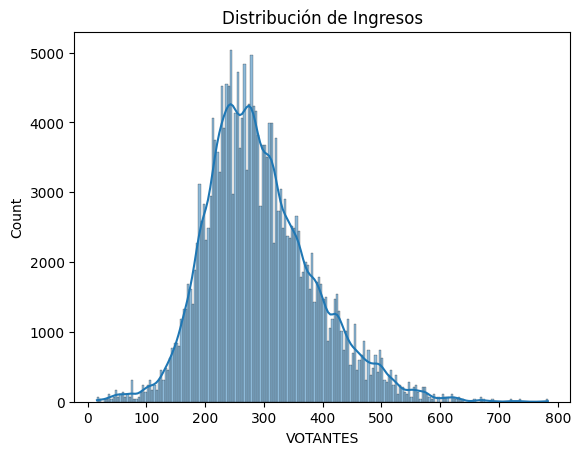

In [6]:
# Hacemos un gráfico de la distribución de los datos de las elecciones por año
sns.histplot(df_ElecUE["2009"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.show()


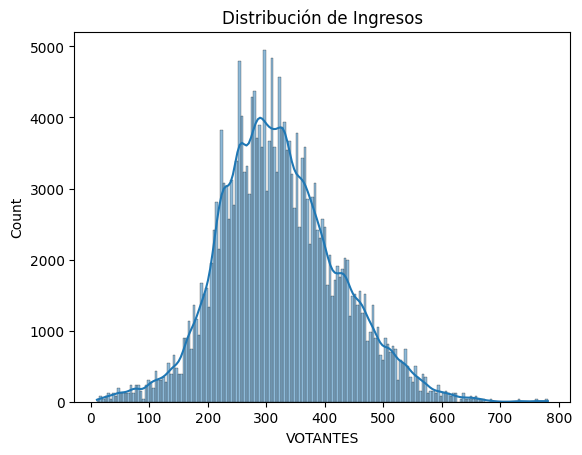

In [7]:
sns.histplot(df_ElecUE["2014"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.show()

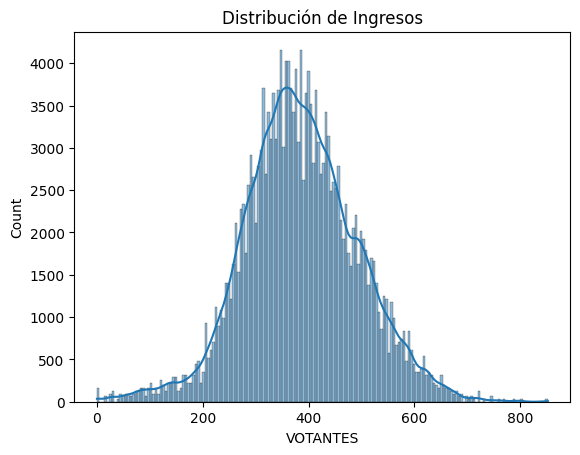

In [8]:
sns.histplot(df_ElecUE["2019"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.show()

In [9]:
# Ahora bien, necesitamos analizar los datos en conjunto, es decir, intentaremos hacer una análisis comparativo 
# entre los años de las elecciones y mostrar la evolución de los votantes y los partidos.
# Para ello, vamos a integrar los tres dataframe en uno solo, al que llamaremos df_final. 
df_final = pd.DataFrame()
for anyo in anyos:
    #df_final = pd.concat([df_ElecUE[2009], df_ElecUE[2014], df_ElecUE[2019]], ignore_index=True)
    df_final = pd.concat([df_final,df_ElecUE[anyo]], ignore_index=True)

# Guardamos el resultado en un nuevo CSV
df_final.to_csv("datos_combinados.csv", index=False)

# Verificar que la unión se hizo correctamente
print(df_final.head())
print(f"Total de filas combinadas: {df_final.shape[0]}")


   ANYO  NUM_ELEC  COD_PROV PROVINCIA  COD_COMARCA         COMARCA  \
0  2009         1         3  Alicante           30  La Marina Alta   
1  2009         1         3  Alicante           30  La Marina Alta   
2  2009         1         3  Alicante           30  La Marina Alta   
3  2009         1         3  Alicante           30  La Marina Alta   
4  2009         1         3  Alicante           30  La Marina Alta   

   COD_MUNICIPIO    MUNICIPIO  DISTRITO  SECCION  ... CENSO  VOTANTES  \
0           3001  Atzúbia, l'         1        1  ...   392       262   
1           3001  Atzúbia, l'         1        1  ...   392       262   
2           3001  Atzúbia, l'         1        1  ...   392       262   
3           3001  Atzúbia, l'         1        1  ...   392       262   
4           3001  Atzúbia, l'         1        1  ...   392       262   

   VALIDOS  BLANCOS  ABSTENCIONES  NULOS  CANDIDATO_COD  CANDIDATO_SIGLAS  \
0      262        1           130      0             14        

In [10]:
# Cambiamos el tipo de dato de la columna ANYO a entero
df_final["Año"] = df_final["ANYO"].astype(int)

# Revisar estructura de los datos
print(df_final.info())

# Revisar valores nulos
print(df_final.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635890 entries, 0 to 635889
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ANYO              635890 non-null  int64 
 1   NUM_ELEC          635890 non-null  int64 
 2   COD_PROV          635890 non-null  int64 
 3   PROVINCIA         635890 non-null  object
 4   COD_COMARCA       635890 non-null  int64 
 5   COMARCA           635890 non-null  object
 6   COD_MUNICIPIO     635890 non-null  int64 
 7   MUNICIPIO         635890 non-null  object
 8   DISTRITO          635890 non-null  int64 
 9   SECCION           635890 non-null  int64 
 10  MESA              635890 non-null  object
 11  CANDIDATURAS      635890 non-null  int64 
 12  CENSO             635890 non-null  int64 
 13  VOTANTES          635890 non-null  int64 
 14  VALIDOS           635890 non-null  int64 
 15  BLANCOS           635890 non-null  int64 
 16  ABSTENCIONES      635890 non-null  int

In [11]:
# Realizamos el test KS comparando con la distribución normal ('norm')
#filtramos los datos para el año 2009
data = df_final["VOTANTES"]
ks_stat, p_value = stats.kstest(data, 'norm')
print("Estadístico KS:", ks_stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Los datos no se distribuyen como una normal")
else:
    print("Los datos se distribuyen como una normal")

Estadístico KS: 0.9997483841544921
p-valor: 0.0
Los datos no se distribuyen como una normal


Como vemos, al llevar a cabo una prueba de normalidad de los datos podemos apreciar que, al menos para el caso de los votantes (dato que engloba casi la totalidad de los datos de interés del estudio) no presentan una distribución normal. Esto podría suponer algun sesgo en cuanto a las conclusiones. Esto mismo se puede observar en los gráficos de distribución de probabilidad que hemos mostrado, sin embargo, y tal como se aprecia en los mismos, la asimetría presente en ellos es relativamente débil, y por tanto, podemos suponer que esto no afecte en mayor proporción las conclusiones generales que podamos tener respecto de los resultados.

Por otro lado, una vez revisados los datos, podemos ver que no hay datos nulos, lo cual es una buena noticia.

In [12]:
import plotly.graph_objects as go

In [13]:
# Crear una tabla pivotada para ver los totales de votos, abstención, nulos y blancos por año
stats_pivot = df_final.pivot_table(index="Año", values=["CENSO","VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"], aggfunc="sum")

# Calcular porcentajes sobre el total de votos
stats_pivot["% Votantes"] = ((stats_pivot["VOTANTES"] / stats_pivot["CENSO"]) * 100).round(2)
stats_pivot["% Votos Validos"] = ((stats_pivot["VALIDOS"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Abstenciones"] = ((stats_pivot["ABSTENCIONES"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Votos Nulos"] = ((stats_pivot["NULOS"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Votos Blanco"] = ((stats_pivot["BLANCOS"] / stats_pivot["CENSO"]) * 100).round(2)


# Mostrar tabla con porcentajes
print(stats_pivot)


      ABSTENCIONES  BLANCOS      CENSO    NULOS   VALIDOS  VOTANTES  \
Año                                                                   
2009      57651265   714420  123767665   436695  65679705  66116400   
2014      69841980  1404390  139891596  1721733  68327883  70049616   
2019      41428128   580800  115982432   567552  73986752  74554304   

      % Votantes  % Votos Validos  % Abstenciones  % Votos Nulos  \
Año                                                                
2009       53.42            53.07           46.58           0.35   
2014       50.07            48.84           49.93           1.23   
2019       64.28            63.79           35.72           0.49   

      % Votos Blanco  
Año                   
2009            0.58  
2014            1.00  
2019            0.50  


Esta tabla nos permite ver el total de votantes, votos validos, abstenciones, votos nulos y votos blancos por cada año, y sus porcentajes respectivamente. Como podemos apreciar la abstención, los votos blancos y los votos nulos presentan una variación significativa en el año 2014. Los votos totales (VOTANTES) yLos votos validos por su parte se han mantenido en crecimiento en todos los casos. Lo más destacable es que la abstenciones han decaído significativamente en las últimas elecciones del año 2019.

In [14]:
stats_pivot_mean = df_final.pivot_table(index="Año", values=["CENSO","VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"], aggfunc="mean")

stats_pivot_mean

,ABSTENCIONES,BLANCOS,CENSO,NULOS,VALIDOS,VOTANTES
Año,,,,,,
2009,255.852594,3.170550,549.272911,1.938024,291.482293,293.420317
2014,321.627155,6.467313,644.210489,7.928700,314.654634,322.583333
2019,214.200695,3.002978,599.677531,2.934480,382.542356,385.476837


El promedio de votantes, votos validos, abstenciones, votos nulos y votos blancos por cada año, y sus porcentajes respectivamente, mantiene el mismo comportamiento del total de los datos.

In [15]:
# Resetear índice para que el año sea columna y no índice
stats_pivot = stats_pivot.reset_index()

# Gráfico de barras usando la versión pivotada
fig1 = px.bar(stats_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
              barmode='group',
              title="Totales de votos y abstención por año",
              labels={"value": "Cantidad", "variable": "Tipo de voto"})

fig1.show()

In [16]:
stats_pivot_mean = stats_pivot_mean.reset_index()

# Gráfico de barras usando la versión pivotada
fig1 = px.bar(stats_pivot_mean, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
              barmode='group',
              title="Totales de promedios de votos y abstención por año",
              labels={"value": "Cantidad", "variable": "Tipo de voto"})

fig1.show()

In [17]:
#stats_provincia_pivot = df_final.pivot_table(index=["PROVINCIA", "Año"], values=["CENSO","VOTANTES", "VALIDOS", "ABSTENCIONES","NULOS" ,"BLANCOS"], aggfunc="sum").reset_index()

# Crear tabla pivotada por provincia y año
stats_provincia_pivot = df_final.pivot_table(index=["Año", "PROVINCIA"], values=["CENSO","VOTANTES","VALIDOS" ,"ABSTENCIONES", "NULOS", "BLANCOS"], aggfunc="sum").reset_index()

# Calcular porcentajes
stats_provincia_pivot["% Votantes"] = ((stats_provincia_pivot["VOTANTES"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Validos"] = ((stats_provincia_pivot["VALIDOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Abstenciones"] = ((stats_provincia_pivot["ABSTENCIONES"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Nulos"] = ((stats_provincia_pivot["NULOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Blanco"] = ((stats_provincia_pivot["BLANCOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)

# Mostrar tabla con porcentajes
print(stats_provincia_pivot)



    Año  PROVINCIA  ABSTENCIONES  BLANCOS     CENSO   NULOS   VALIDOS  \
0  2009   Alicante      21460565   226765  43264935  138950  21665420   
1  2009  Castellón       6894195    98525  14576170   59500   7622475   
2  2009   Valencia      29296505   389130  65926560  238245  36391810   
3  2014   Alicante      26819325   443625  49394358  642564  21932469   
4  2014  Castellón       8175609   182988  16327272  281814   7869849   
5  2014   Valencia      34847046   777777  74169966  797355  38525565   
6  2019   Alicante      16390048   190752  41148672  204096  24554528   
7  2019  Castellón       4501248    87616  13412608   90272   8821088   
8  2019   Valencia      20536832   302432  61421152  273184  40611136   

   VOTANTES  % Votantes  % Votos Validos  % Abstenciones  % Votos Nulos  \
0  21804370       50.40            50.08           49.60           0.32   
1   7681975       52.70            52.29           47.30           0.41   
2  36630055       55.56            55.20    

In [18]:
# Gráfico de barras por provincia
fig2 = px.bar(stats_provincia_pivot, x="PROVINCIA", y=["VOTANTES", "VALIDOS", "ABSTENCIONES","NULOS","BLANCOS"],
              barmode='group',
              facet_row="Año", #facet_col="Año",
              title="Totales de votos, validos, nulos y abstención por provincia",
              labels={"value": "Cantidad", "variable": "Tipo de voto"},height=900)

fig2.show()


Las conclusiones antes descritas se mantienen al hacer la agregación en las tres provincias. Se observa en cada caso el descenso de la abstención, y el aumento de votos validos.

In [19]:
# Gráfico de líneas para mostrar tendencia
fig1 = px.line(stats_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
               title="Tendencia de votos y abstención por año",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)

fig1.show()


A continuación se muestran gráficos de tendencia (lineales) que representan los datos anteriores.

In [20]:
# Gráfico de líneas con facetas por provincia
fig2 = px.line(stats_provincia_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
               facet_col="PROVINCIA", title="Tendencia de votos y abstención por provincia",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)

fig2.show()


In [21]:
# Gráfico de líneas con porcentajes en lugar de totales
fig = px.line(stats_pivot, x="Año", y=["% Votantes","% Votos Validos","% Abstenciones", "% Votos Nulos", "% Votos Blanco"],
               title="Tendencia de porcentajes de votos por año",
               labels={"value": "Porcentaje", "variable": "Tipo de voto"},
               markers=True)

fig.show()


In [22]:
px.line(stats_provincia_pivot, x="Año", y=["% Votantes","% Votos Validos","% Abstenciones", "% Votos Nulos", "% Votos Blanco"],
               facet_col="PROVINCIA", title="Tendencia de votos y abstención por provincia",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)

fig.show()

In [23]:
# Resumen de estadísticas claves:
# Hacemos una resumen de los votos, validos, abstenciones, nulos y blancos
stats = df_final.groupby("ANYO").agg({
    "VOTANTES": ["sum", "mean", "std"],
    "ABSTENCIONES": ["sum", "mean", "std"],
    "NULOS": ["sum"],
    "BLANCOS": ["sum"]
}).reset_index()

# Mostrar tabla estadística ( dos niveles)
#print(stats)
display(stats)
stats

df_final.groupby("ANYO").agg

ANYO  VOTANTES                         ABSTENCIONES              \
              sum        mean         std          sum        mean   
0  2009  66116400  293.420317   92.689799     57651265  255.852594   
1  2014  70049616  322.583333  101.282211     69841980  321.627155   
2  2019  74554304  385.476837  107.856491     41428128  214.200695   

                 NULOS  BLANCOS  
          std      sum      sum  
0   87.161420   436695   714420  
1  102.862376  1721733  1404390  
2   81.739547   567552   580800

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000019908068FB0>>

#### Evolución de los partidos
Vamos a hacer ahora el análisis para dos situaciones concretas: 
1. Para los 10 partidos más votados en cada una de las elecciones 
2. Para cada uno de esos partidos ver como han evolucionado en cada una de esas elecciones. 

In [25]:
# Agrupar por año y partido para obtener votos acumulados
df_agrupado = df_final.groupby(["Año", "CANDIDATO_DESC"])["VOTOS"].sum().reset_index()

# Identificar todos los partidos que alguna vez estuvieron en el Top 10
top_partidos_totales = df_agrupado.sort_values(["Año", "VOTOS"], ascending=[True, False]).groupby("Año").head(10)
partidos_relevantes = top_partidos_totales["CANDIDATO_DESC"].unique()

# Filtrar el DataFrame original para incluir solo estos partidos en todas las elecciones
df_seguimiento = df_agrupado[df_agrupado["CANDIDATO_DESC"].isin(partidos_relevantes)]

# Pivotar para estructurar correctamente los datos sin usar `melt()`
df_pivot = df_seguimiento.pivot_table(index="CANDIDATO_DESC", columns="Año", values="VOTOS").fillna(0)

# Convertir en formato adecuado para gráficos (evitando listas en `x` y `y`)
df_pivot.reset_index(inplace=True)
df_long = pd.DataFrame(columns=["CANDIDATO_DESC", "Año", "VOTOS"])

for año in df_pivot.columns[1:]:  # Excluir la columna de partido
    temp = df_pivot[["CANDIDATO_DESC", año]].copy()
    temp.columns = ["CANDIDATO_DESC", "VOTOS"]
    temp["Año"] = año
    df_long = pd.concat([df_long, temp])



df_long


C:\Users\Abelardo\AppData\Local\Temp\ipykernel_24988\2009112383.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,CANDIDATO_DESC,Año,VOTOS
0,Ara Repúbliques-Esquerra Republicana del País ...,2009,0.0
1,Bloc Nacionalista Valencià-Coalició per Europa,2009,18369.0
2,Ciudadanos-Partido de la Ciudadanía,2009,0.0
3,Coalició Compromís,2009,0.0
4,Coalición Verde-Europa Ciudadana,2009,0.0
...,...,...,...
18,Podemos-Podem,2019,0.0
19,Unidas Podemos cambiar Europa/Unides Podem can...,2019,223724.0
20,Unió Valenciana,2019,0.0
21,Unión Progreso y Democracia,2019,0.0


Es importante destacar que el agrupamiento por  `Año` y partido político (`CANDIDATO_DESC`) en el DataFrame `df_agrupado` es crucial para obtener la evolución de los partidos. Sin embargo, hemos notado que el comportamoiento de los partidos políticos, los cuales son un gran número, es irregular, lo que dificulta una agrupación y selección de los mismos. En un principio se decidió elegir los 10 partidos más votados y hacer un seguimiento de los mismos, sin embargo, su irregularidad hace que estos en muchos casos no entren en el mismo grupo o bien desaparecen del listado por una u otra razón, o bien dejan de ser los más votados o bien desaparece la agrupación política decae a mínimos. En un principio decidimos: Si el grupo político sale del top 10, mantenerlo con los votos que alcance en su periodo de elección y si este no tiene votos, simplemente asignar 0.

In [26]:
# Graficar evolución corregida
fig = px.bar(df_long, x="Año", y="VOTOS", color="CANDIDATO_DESC",
              title="Evolución refinada de partidos con seguimiento completo",
              labels={"VOTOS": "Total de votos", "CANDIDATO_DESC": "Partido"},
              barmode="group")

fig.show()


El gráfico muestra los 10 partidos más votados. Obviamente el número de la lista puede crecer o mantenerse, lo cual lo hace bastante complejo para representarse dado el ámbito en el que se presentan los partidos políticos.

A continuación pretendemos implementar una visulaización geográfica con las herramientas que nos proporciona python.

In [169]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geo_app")
ubicacion = geolocator.geocode("Valencia, España")

print(ubicacion.latitude, ubicacion.longitude)  # Coordenadas de Valencia

39.4697065 -0.3763353


In [ ]:
votos_provincia_año = df_final.groupby(["Año", "PROVINCIA"])["VOTANTES"].sum().reset_index()

votos_provincia_año

,Año,PROVINCIA,VOTANTES
0,2009,Alicante,21804370
1,2009,Castellón,7681975
2,2009,Valencia,36630055
3,2014,Alicante,22575033
4,2014,Castellón,8151663
5,2014,Valencia,39322920
6,2019,Alicante,24758624
7,2019,Castellón,8911360
8,2019,Valencia,40884320


In [37]:
#!pip install ipywidgets



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en la Comunidad Valenciana
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=8, tiles="CartoDB positron")

# Coordenadas de provincias
coordenadas_provincias = {
    "Alicante": [38.3452, -0.4810],
    "Castellón": [39.9864, -0.0513],
    "Valencia": [39.4699, -0.3763]
}


# Obtener datos en formato adecuado
datos_calor = []
for _, fila in votos_provincia_año.iterrows():
    provincia = fila["PROVINCIA"]
    año = fila["Año"]
    votos = fila["VOTANTES"]
    coordenadas = coordenadas_provincias.get(provincia, None)
    
    if coordenadas:
        datos_calor.append([coordenadas[0], coordenadas[1], votos])

# Agregar la capa de calor al mapa
HeatMap(data=datos_calor, radius=20, gradient={0.2: "blue", 0.5: "green", 0.8: "yellow", 1: "red"}).add_to(mapa)

# Mostrar el mapa
mapa

Mediante este mapa de calor, podemos apreciar que el número de votantes es mayor en el área metropolitana de la Comunidad Valenciana, lo cual es un fenomeno que se da debido a la importancia de la ciudad de Valencia en el contexto de la elección.

In [52]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en la Comunidad Valenciana
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=8, tiles="CartoDB positron")

# Datos de comarcas con votos
comarcas_votos = df_final.groupby(["Año", "Comarca"])[["Latitud", "Longitud", "Votos_Totales"]].sum().reset_index()



KeyError: 'Comarca'

In [51]:
# Función para agregar marcadores y mapa de calor por año
def actualizar_mapa_comarcas(año):
    mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=8, tiles="CartoDB positron")
    
    datos_calor = []
    for _, fila in comarcas_votos[comarcas_votos["Año"] == año].iterrows():
        comarca = fila["Comarca"]
        lat, lon, votos = fila["Latitud"], fila["Longitud"], fila["Votos_Totales"]
        
        folium.Marker(
            location=[lat, lon],
            popup=f"{comarca} ({año})\nVotos: {votos}",
            tooltip=comarca
        ).add_to(mapa)
        
        datos_calor.append([lat, lon, votos])

    # Agregar capa de calor
    HeatMap(data=datos_calor, radius=15, gradient={0.2: "blue", 0.5: "green", 0.8: "yellow", 1: "red"}).add_to(mapa)
    
    return mapa

# Visualizar el mapa por defecto con los datos de 2009
mapa_comarcas = actualizar_mapa_comarcas(2009)

# Mostrar el mapa
mapa_comarcas

NameError: name 'comarcas_votos' is not defined

In [172]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en la Comunidad Valenciana
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=8, tiles="CartoDB positron")

# Lista de comarcas con coordenadas y votos ficticios
comarcas = [
    ["L'Alcalatén", 40.0667, -0.2333, 5000],
    ["Alt Maestrat", 40.3833, -0.1333, 3000],
    ["Alt Millars", 39.9167, -0.5667, 7000],
    ["Alt Palància", 39.85, -0.55, 4500],
    ["Alt Vinalopó", 38.6333, -0.9, 6000],
    ["Baix Maestrat", 40.5, 0.4167, 8000],
    ["Baix Vinalopó", 38.2667, -0.7, 5500],
    ["L'Alacantí", 38.5, -0.4833, 9000],
    ["Camp de Morvedre", 39.6667, -0.2833, 4000],
    ["Camp de Túria", 39.6333, -0.5667, 7500],
    ["La Canal de Navarrés", 39.0833, -0.75, 6200],
    ["El Comtat", 38.75, -0.3333, 4800],
    ["La Costera", 39.0167, -0.5167, 5300],
    ["Horta Nord", 39.5333, -0.3667, 8900],
    ["Horta Sud", 39.4167, -0.45, 9200],
    ["L'Alcoià", 38.6667, -0.5, 6700],
    ["La Foia de Bunyol - Xiva", 39.4167, -0.75, 7100],
    ["Marina Alta", 38.8333, 0.0667, 5800],
    ["Marina Baixa", 38.5667, -0.1167, 7600],
    ["Plana Alta", 40.0667, -0.05, 8300],
    ["Plana Baixa", 39.85, -0.0833, 4900],
    ["Plana de Utiel-Requena", 39.5667, -1.2, 6200],
    ["Rincón de Ademuz", 40.0833, -1.3, 3500],
    ["La Safor", 38.8833, -0.1833, 9200],
    ["La Vall d'Albaida", 38.8333, -0.55, 6800]
]

# Agregar marcadores de comarcas
for comarca in comarcas:
    folium.Marker(
        location=[comarca[1], comarca[2]],
        popup=f"{comarca[0]} - {comarca[3]} votos",
        tooltip=comarca[0]
    ).add_to(mapa)

# Agregar capa de calor
HeatMap([[c[1], c[2], c[3]] for c in comarcas], radius=15).add_to(mapa)

# Mostrar el mapa
mapa



In [156]:
import folium
import pandas as pd

# Cargar archivo GeoJSON de la Comunidad Valenciana
geojson_url = "https://gist.githubusercontent.com/josemamira/ba6811e98859fdf6a734f670207ef1cc/raw/59fb33a131151771ddaf9b5913ea6dc1d7109dcc/cv_municipios.geojson"  # Reemplaza con la URL real

geojson_url

'https://gist.githubusercontent.com/josemamira/ba6811e98859fdf6a734f670207ef1cc/raw/59fb33a131151771ddaf9b5913ea6dc1d7109dcc/cv_municipios.geojson'

In [175]:
# Obtener el partido más votado en cada provincia por año
top_partidos_provincia = df_final.loc[df_final.groupby(["Año", "PROVINCIA"])["VOTANTES"].idxmax(), ["Año", "PROVINCIA", "CANDIDATO_SIGLAS", "VOTANTES"]]

# Obtener el partido más votado en cada comarca por año
top_partidos_comarca = df_final.loc[df_final.groupby(["Año", "COMARCA"])["VOTANTES"].idxmax(), ["Año", "COMARCA", "CANDIDATO_SIGLAS", "VOTANTES"]]

# Verificar los datos
print(top_partidos_provincia.head())
print(top_partidos_comarca.head())


         Año  PROVINCIA CANDIDATO_SIGLAS  VOTANTES
58135   2009   Alicante              MSR       514
112607  2009  Castellón              UNA       668
190330  2009   Valencia               RC       783
250109  2014   Alicante         P.C.P.E.       534
331308  2014  Castellón            I.FEM       781
         Año           COMARCA   CANDIDATO_SIGLAS  VOTANTES
103740  2009   El Alto Mijares                 IF       320
94605   2009  El Alto Palancia           LIBERTAS       641
78932   2009  El Alto Vinalopó                UNA       404
106715  2009  El Baix Maestrat               BLOC       560
45838   2009  El Baix Vinalopó  EXTREMADURA UNIDA       429


In [182]:

color_partidos = {
    "Partido A": "#ff0000",
    "Partido B": "#00ff00",
    "Partido C": "#0000ff",
    "Partido D": "#ffff00",
    "Partido E": "#ff00ff",
    "Partido F": "#00ffff",
    "Partido G": "#800000",
    "Partido H": "#808000",
    "Partido I": "#008080",
    "Partido J": "#800080"
}






In [183]:
import json

# Cargar GeoJSON de Comunidad Valenciana
geojson_path = "cv_municipios.geojson.json"
with open(geojson_path, "r", encoding="utf-8") as f:
    geojson_data = json.load(f)

# Ver estructura del archivo
print(json.dumps(geojson_data["features"][0], indent=4))


{
    "type": "Feature",
    "properties": {
        "cpro": "46",
        "name_3": "Horta Sud",
        "provincia": "Valencia",
        "communidad_autonoma": "Comunidad Valenciana",
        "cmun": "094",
        "codigo_postal": "46094",
        "engtype_4": "Municipality",
        "geo_point_2d": [
            39.396417947314305,
            -0.394658359703133
        ],
        "dc": "5",
        "id_2": 37,
        "id_3": 274,
        "id_0": 215,
        "id_1": 10,
        "iso": "ESP",
        "id_4": 6730,
        "type_4": "Municipality",
        "pais": "Spain",
        "ccn_4": 0,
        "municipio": "Catarroja",
        "codine": "46094",
        "nombre": "Catarroja",
        "pop": 28120,
        "CodMunicipio": 46094
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    -0.405613005161285,
                    39.41287994384771
                ],
                [
                    -0.39568

In [189]:
import folium

# Crear mapa centrado en la Comunidad Valenciana
mapa = folium.Map(location=[39.4699, -0.3763], zoom_start=8, tiles="CartoDB positron")

# Función para asignar colores según el partido más votado en un año específico
def get_fill_color(feature, tipo, año):
    nombre_zona = feature["properties"]["NOMBRE"]  # Cambia si el campo tiene otro nombre

    if tipo == "PROVINCIA":
        partido_ganador = top_partidos_provincia[(top_partidos_provincia["PROVINCIA"] == nombre_zona) & (top_partidos_provincia["Año"] == año)]["CANDIDATO_SIGLAS"].values[0]
    else:
        partido_ganador = top_partidos_comarca[(top_partidos_comarca["COMARCA"] == nombre_zona) & (top_partidos_comarca["Año"] == año)]["CANDIDATO_SIGLAS"].values[0]

    return color_partidos.get(partido_ganador, "#cccccc")  # Color gris si no hay partido asignado

# Agregar provincias coloreadas para cada año
for año in [2009, 2014, 2019]:
    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            "fillColor": get_fill_color(feature, "PROVINCIA", año),
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["CANDIDATO_SIGLAS"], labels=True, sticky=True)
    ).add_to(mapa)

# Agregar comarcas coloreadas para cada año
for año in [2009, 2014, 2019]:
    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            "fillColor": get_fill_color(feature, "COMARCA", año),
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["CANDIDATO_SIGLAS"], labels=True, sticky=True)
    ).add_to(mapa)

# Mostrar el mapa
mapa


KeyError: 'NOMBRE'

In [ ]:
#!pip install geopandas folium plotly pandas


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [174]:
top_partidos_comarca = df_final.loc[df_final.groupby("COMARCA")["VOTANTES"].idxmax(), ["COMARCA", "CANDIDATO_SIGLAS", "VOTANTES"]]
top_partidos_provincia = df_final.loc[df_final.groupby("PROVINCIA")["VOTANTES"].idxmax(), ["PROVINCIA", "CANDIDATO_SIGLAS", "VOTANTES"]]


# Verificar los datos
print(top_partidos_provincia.head())
print(top_partidos_comarca.head())


        PROVINCIA      CANDIDATO_SIGLAS  VOTANTES
469178   Alicante                 PACMA       647
331308  Castellón                 I.FEM       781
559378   Valencia  ARA REPÚBLIQUES-ERPV       852
                 COMARCA     CANDIDATO_SIGLAS  VOTANTES
532818   El Alto Mijares        CEX-CREX-PREX       381
326847  El Alto Palancia  PARTIDO ANDALUCISTA       760
463270  El Alto Vinalopó                 SAIn       630
513856  El Baix Maestrat                 SAIn       621
481377  El Baix Vinalopó                 MIEL       592


In [99]:
df_final.pivot_table(index="ANYO", columns="PROVINCIA", values="VALIDOS", aggfunc="sum")

PROVINCIA,Alicante,Castellón,Valencia
ANYO,,,
2009,21665420,7622475,36391810
2014,21932469,7869849,38525565
2019,24554528,8821088,40611136


## 2. Obtención de los datos mediante API

En esta sección intentaremos acceder al conunto de datos a partir de la API de la web del gobierno.
Este es otro medio por el que los Data SCience pueden obtener los datos. EL éxito al aplicar este método dependerá de tener la API con su dirección lo más correcta posible.

In [23]:
### 2. Obtención de datos mediante API
from fake_useragent import UserAgent
import json

# Identificador de la Generalitat Valenciana
gv_id = "A10002983"  # Puedes confirmar este identificador según los datos que extrajiste antes

ua = UserAgent()
headers = {'User-Agent': ua.random}

In [29]:
#url = "https://datos.gob.es/apidata/catalog/dataset/a10002983-resultados-de-elecciones-europeas?"
#/a10002983
#url = "https://datos.gob.es/apidata/catalog/publisher?_sort=notation&_pageSize=10&_page=1"
#url = f"https://datos.gob.es/apidata/catalog/dataset?_sort=title&_publisher={gv_id}"
url = "https://datos.gob.es/apidata/catalog/dataset?_sort=title&_pageSize=10"
url = "https://datos.gob.es/apidata/catalog/dataset?_sort=title&_pageSize=20"


ua = UserAgent()
headers = {'User-Agent': ua.random}
response = requests.get(url, headers=headers)


if response.status_code == 200:
    data = response.json()

    # Imprimir toda la estructura del JSON para inspección manual
    print("Estructura de la respuesta:")
    print(json.dumps(data, indent=2))

else:
    print("Error al obtener los datasets:", response.status_code)




Estructura de la respuesta:
{
  "format": "linked-data-api",
  "version": "0.2",
  "result": {
    "_about": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_sort=title",
    "definition": "http://datos.gob.es/apidata/catalog/meta/dataset.json?_sort=title",
    "extendedMetadataVersion": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_metadata=all&_sort=title",
    "first": "http://datos.gob.es/apidata/catalog/dataset.json?_page=0&_sort=title",
    "isPartOf": {
      "_about": "http://datos.gob.es/apidata/catalog/dataset.json?_sort=title",
      "definition": "http://datos.gob.es/apidata/catalog/meta/dataset.json?_sort=title",
      "hasPart": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_sort=title",
      "type": "http://purl.org/linked-data/api/vocab#ListEndpoint"
    },
    "items": [
      {
        "_about": "https://datos.gob.es/catalogo/l01431482-actividades",
        "accrualPeriodicity": {
          "_about": "https://datos.go

In [30]:
if response.status_code == 200:
    data = response.json()

    # Filtrar los resultados para encontrar la Generalitat Valenciana
    gv_publisher = [item for item in data["result"]["items"] if "Generalitat Valenciana" in item["prefLabel"]]

    if gv_publisher:
        print("Publicador encontrado:")
        print(gv_publisher)
    else:
        print("No se encontraron resultados para la Generalitat Valenciana.")
else:
    print("Error al obtener los datos:", response.status_code)


KeyError: 'prefLabel'

In [31]:
if response.status_code == 200:
    data = response.json()
    
    # Filtrar los resultados para encontrar la Generalitat Valenciana
    gv_publisher = [item for item in data["result"]["items"] if "Generalitat Valenciana" in item["prefLabel"]]

    if gv_publisher:
        # Obtener el identificador de la Generalitat Valenciana
        gv_id = gv_publisher[0]["notation"]
        print("Identificador de la Generalitat Valenciana:", gv_id)

        # Construir la URL para consultar los datasets de la Generalitat Valenciana
        datasets_url = f"https://datos.gob.es/apidata/catalog/dataset?_sort=title&_publisher={gv_id}"

        # Obtener los datasets
        datasets_response = requests.get(datasets_url)

        if datasets_response.status_code == 200:
            datasets_data = datasets_response.json()
            print("Datasets disponibles:")
            
            for item in datasets_data["result"]["items"]:
                print(f"Título: {item.get('title', 'No disponible')}")
                print(f"Enlace al dataset: {item['_about']}\n")
        else:
            print("Error al obtener los datasets:", datasets_response.status_code)
    else:
        print("No se encontraron resultados para la Generalitat Valenciana.")
else:
    print("Error al obtener los datos:", response.status_code)

KeyError: 'prefLabel'

Finalmente, después de varios intentos, no hemos podido conseguir la dirección API correcta. Probablemente alguna de las que hemos intentado o no es la correcta o hay algun problema de acceso a la API correcta.

### 3. Obtención de datos mediante SQLALCHEMY

In [32]:
import sqlite3
from sqlalchemy import create_engine


In [ ]:
# Datos de conexión (reemplaza con los tuyos)


# Crear la cadena de conexión
bbdd_aiven_sql = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(bbdd_aiven_sql, echo=False)


In [34]:
elecciones_df = pd.read_sql_table("AÑOS", con=engine)
elecciones_df

,AÑOSID,AÑO
0,1,2019
1,2,2014
2,3,2009
